# Data importing

In [1]:
TRAIN_FILE = "TrainOnMe.csv"
EVALUATE_FILE = "EvaluateOnMe.csv"

In [2]:
import pandas as pd

df = pd.read_csv(TRAIN_FILE, index_col=0)
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
id,,,,,,,,,,,
0,Bob,-0.78103,-0.63375,-0.03665,0.27517,False,F,-1.85755,0.22668,-2.35130,1.42092
1,Bob,0.42649,-0.50019,0.00696,0.11817,False,F,-1.73761,-1.61015,-5.12219,1.87723
2,Atsuto,1.86817,-0.45565,0.07658,0.09662,False,F,1.02798,-0.92326,-1.67111,2.07828
3,Atsuto,-1.80073,0.08535,-0.02467,0.14032,False,F,2.02793,-0.46318,2.41329,-0.62963
4,Bob,1.56943,-1.25860,-0.02092,0.22267,False,F,-0.43304,-1.99881,-1.58241,2.28423


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1001 non-null   object 
 1   x1      1001 non-null   object 
 2   x2      1000 non-null   object 
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   object 
 6   x6      1000 non-null   object 
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     998 non-null    float64
dtypes: float64(6), object(5)
memory usage: 93.8+ KB


Let's check if there are some duplicates

In [4]:
df.shape

(1001, 11)

In [5]:
df.drop_duplicates().shape

(1001, 11)

Now we need to deal with missing data. Let's first check how many null values are present

In [6]:
df.isnull().sum()

y      0
x1     0
x2     1
x3     1
x4     1
x5     1
x6     1
x7     1
x8     1
x9     1
x10    3
dtype: int64

Let's try to drop them

In [7]:
df_nonnull = df.dropna()
df_nonnull.shape

(998, 11)

It seems reasonable to drop them.

In [8]:
df_nonnull.describe(include="all")

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,998,998,998,998.000000,998.000000,998,998,998.000000,998.000000,998.000000,998.000000
unique,3,996,997,NaN,NaN,3,7,NaN,NaN,NaN,NaN
top,Bob,-1.12820,-0.02203,NaN,NaN,False,F,NaN,NaN,NaN,NaN
freq,518,2,2,NaN,NaN,684,617,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-0.445981,0.550963,NaN,NaN,-1.071334,300.389959,-0.996938,1.142178
std,NaN,NaN,NaN,0.408433,0.353907,NaN,NaN,31.714140,9496.343517,1.997862,1.266401
min,NaN,NaN,NaN,-1.489320,-0.065550,NaN,NaN,-1000.921370,-3.160020,-7.066070,-3.016430
25%,NaN,NaN,NaN,-0.727308,0.269537,NaN,NaN,-1.110205,-1.138488,-2.347742,0.330207
50%,NaN,NaN,NaN,-0.427315,0.526150,NaN,NaN,-0.361740,-0.483740,-1.372585,1.125040
75%,NaN,NaN,NaN,-0.122160,0.793805,NaN,NaN,0.901715,0.504500,-0.083087,1.921645


Something's wrong in the `x1` and `x2` columns

In [9]:
df_nonnull['x1'].describe()

count          998
unique         996
top       -1.12820
freq             2
Name: x1, dtype: object

In [10]:
df_nonnull['x1'].values

array(['-0.78103', '0.42649', '1.86817', '-1.80073', '1.56943', '0.14361',
       '-0.34399', '-0.05407', '-0.71673', '-0.13301', '-1.12513',
       '0.78906', '-0.71810', '2.16735', '0.93449', '-0.13716', '1.64086',
       '-0.24657', '-1.39105', '-2.96708', '-0.67375', '-1.96784',
       '0.65774', '0.15784', '-0.47400', '-2.09138', '-1.08743',
       '0.08786', '-1.12978', '-0.16543', '-1.32451', '1.09668',
       '-0.19837', '-1.64125', '-1.12006', '0.10616', '-0.17524',
       '-0.56264', '-1.81644', '-1.30379', '0.87676', '1.43970',
       '0.76226', '2.75110', '2.34596', '0.81662', '1.18802', '-2.99311',
       '-1.08398', '-0.17204', '1.39140', '2.56850', '1.01848',
       '-2.38085', '-0.23641', '-1.82425', '3.32967', '0.68155',
       '1.84843', '0.90390', '0.29566', '1.55554', '0.42041', '-1.58806',
       '-0.41053', '-0.49222', '1.59560', '0.85574', '1.30958', '0.94582',
       '0.43314', '-1.24696', '0.40461', '-1.94535', '2.61046', '0.27969',
       '-0.88417', '0.51368'

Ok, so it seems like there are some unwanted values. Let's remove them

In [11]:
is_valid_entry = pd.to_numeric(df_nonnull['x1'], errors="coerce").notnull()
df_cleaned = df_nonnull[is_valid_entry].copy()

df_cleaned['x1'] = pd.to_numeric(df_cleaned['x1'])
df_cleaned['x1'].describe()

count    997.000000
mean       0.006998
std        1.379982
min       -5.185640
25%       -1.012550
50%        0.060380
75%        0.945820
max        4.727720
Name: x1, dtype: float64

Now let's do it for the x2 as well

In [12]:
df_cleaned['x2'] = df_cleaned['x2'].copy().apply(pd.to_numeric)

But what about the categorical attributes?

In [13]:
df_cleaned.x5.unique()

array(['False', 'True', '?'], dtype=object)

In [14]:
valid_index = df_cleaned.x5.isin(['False', 'True'])
df_cleaned = df_cleaned[valid_index]

df_cleaned.x5.unique()

array(['False', 'True'], dtype=object)

In [15]:
df_cleaned.x6.unique()

array(['F', 'E', 'A', 'D', 'B', 'Fx', 'C'], dtype=object)

Much better. Now let's analyse the data

In [16]:
df_cleaned.describe()

,x1,x2,x3,x4,x7,x8,x9,x10
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,0.007533,0.022367,-0.445795,0.550933,-1.075842,300.991661,-0.998763,1.143905
std,1.380572,1.012845,0.408331,0.353657,31.745781,9505.873278,1.995991,1.266955
min,-5.185640,-3.084350,-1.489320,-0.065550,-1000.921370,-3.160020,-7.066070,-3.016430
25%,-1.013123,-0.657362,-0.725642,0.269733,-1.110627,-1.140515,-2.347668,0.332943
50%,0.061510,0.001675,-0.427315,0.526150,-0.364360,-0.485625,-1.372585,1.126860
75%,0.946478,0.716940,-0.122180,0.793195,0.900065,0.503080,-0.089362,1.922308
max,4.727720,3.367550,0.408030,1.383830,5.179980,300000.084080,6.235410,6.002050


Those big and small values are suspicious. Let's check if there are some outliers

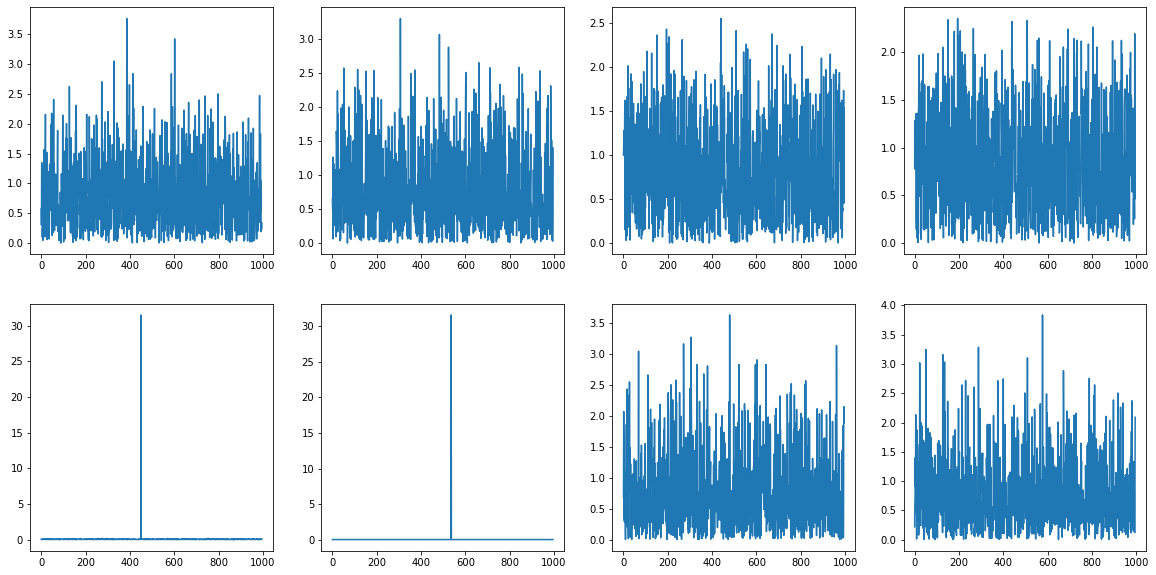

In [17]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

zscore = np.abs(stats.zscore(df_cleaned.select_dtypes(include=["float"])))

ncols = zscore.shape[1]//2
fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(20,10))
for i in range(zscore.shape[1]):
    axes[i // ncols][i%ncols].plot(zscore[:, i])

Ok, let's get rid of those outliers

In [18]:
ZSCORE_THREASHOLD = 4

is_inlier = ~ (zscore > ZSCORE_THREASHOLD).any(axis=1)
df_inliers = df_cleaned[is_inlier]
df_inliers.info();

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       994 non-null    object 
 1   x1      994 non-null    float64
 2   x2      994 non-null    float64
 3   x3      994 non-null    float64
 4   x4      994 non-null    float64
 5   x5      994 non-null    object 
 6   x6      994 non-null    object 
 7   x7      994 non-null    float64
 8   x8      994 non-null    float64
 9   x9      994 non-null    float64
 10  x10     994 non-null    float64
dtypes: float64(8), object(3)
memory usage: 93.2+ KB


In [19]:
df_inliers.describe()

,x1,x2,x3,x4,x7,x8,x9,x10
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.006400,0.023595,-0.445279,0.550546,-0.071969,-0.213060,-0.998741,1.142132
std,1.379038,1.012807,0.408517,0.353871,1.439931,1.322955,1.997997,1.267227
min,-5.185640,-3.084350,-1.489320,-0.065550,-3.467200,-3.160020,-7.066070,-3.016430
25%,-1.011155,-0.656235,-0.723483,0.269537,-1.110205,-1.141125,-2.347742,0.330207
50%,0.061510,0.001675,-0.426865,0.525895,-0.364360,-0.485625,-1.378330,1.125040
75%,0.945615,0.718580,-0.122160,0.792440,0.898640,0.501180,-0.083087,1.921645
max,4.727720,3.367550,0.408030,1.383830,5.179980,4.752890,6.235410,6.002050


# Data Analysis

Let's give a look at the correlation

In [20]:
# we need first to encode the y column to be able to calculate the correlation
df_encoded = df_inliers.copy()
df_encoded.y = df_inliers.y.astype("category").cat.codes
df_encoded.corr()

,y,x1,x2,x3,x4,x7,x8,x9,x10
y,1.000000,0.022638,-0.051051,-0.105715,0.120856,-0.088872,-0.336538,-0.156145,0.060598
x1,0.022638,1.000000,-0.343132,0.035759,-0.032281,0.022165,-0.000714,0.034032,-0.004730
x2,-0.051051,-0.343132,1.000000,0.039182,-0.032491,-0.032341,0.006205,-0.027713,0.059507
x3,-0.105715,0.035759,0.039182,1.000000,-0.977787,-0.264372,-0.232791,-0.173088,-0.048098
x4,0.120856,-0.032281,-0.032491,-0.977787,1.000000,0.275838,0.236187,0.176724,0.053363
x7,-0.088872,0.022165,-0.032341,-0.264372,0.275838,1.000000,0.421771,0.351817,0.054130
x8,-0.336538,-0.000714,0.006205,-0.232791,0.236187,0.421771,1.000000,0.328963,-0.033234
x9,-0.156145,0.034032,-0.027713,-0.173088,0.176724,0.351817,0.328963,1.000000,-0.080978
x10,0.060598,-0.004730,0.059507,-0.048098,0.053363,0.054130,-0.033234,-0.080978,1.000000


`x3` and `x4` show an interesting value...

In [21]:
df_inliers.y.unique()

array(['Bob', 'Atsuto', 'Jörg'], dtype=object)

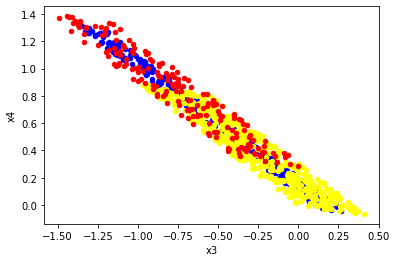

In [22]:
ax = df_inliers[df_inliers.y == 'Atsuto'].plot(kind='scatter', x='x3', y='x4', c='blue');
df_inliers[df_inliers.y == 'Bob'].plot(kind='scatter', x='x3', y='x4', ax=ax, c='yellow');
df_inliers[df_inliers.y == 'Jörg'].plot(kind='scatter', x='x3', y='x4', ax=ax, c='red');

`x3` and `x4` seem to be strongly correlated here. We should remember it for later. Instead, for the other attributes

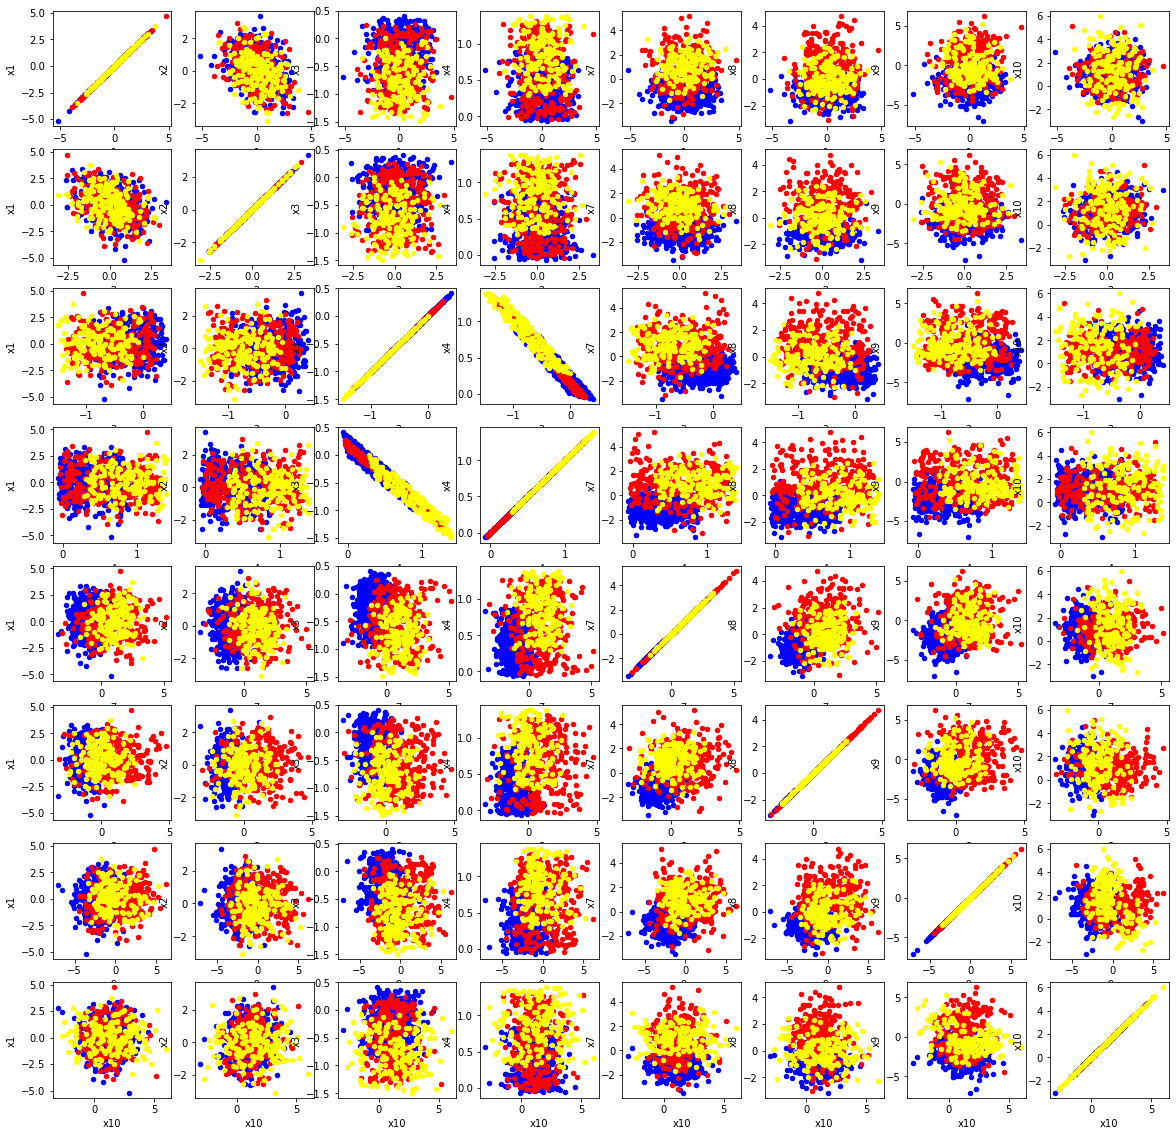

In [23]:
def plot_correlations(df):
    fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 20))
    numerical_attributes = [1, 2, 3, 4, 7, 8, 9, 10]

    labels = df.y.unique()
    colors = ['blue', 'red', 'yellow']
    for ax_i, i in enumerate(numerical_attributes):
        for ax_j, j in enumerate(numerical_attributes):
            for k, label in enumerate(labels):
                df[df.y == label].plot(kind='scatter', x='x' + str(i), y='x' + str(j), ax=axes[ax_i][ax_j], 
                                      c=colors[k]);
            
plot_correlations(df_inliers)

Let's see something about the categorical attributes.

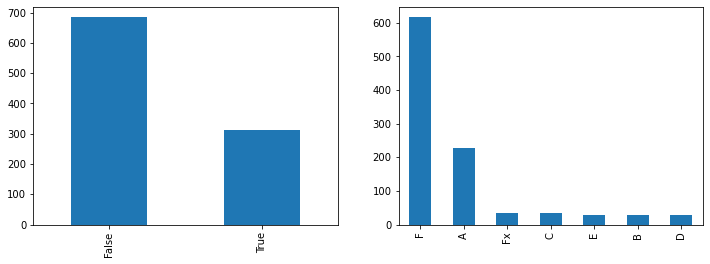

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

df_cleaned.x5.value_counts().plot(ax=axes[0], kind="bar");
df_cleaned.x6.value_counts().plot(ax=axes[1], kind="bar");

What about the labels?

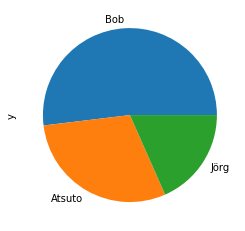

In [25]:
df_cleaned.y.value_counts().plot(kind="pie");

# Data preprocessing and modeling

Let's transform the categorical attributes into numerical ones

In [26]:
from sklearn import preprocessing 

df_cleaned.dtypes

y       object
x1     float64
x2     float64
x3     float64
x4     float64
x5      object
x6      object
x7     float64
x8     float64
x9     float64
x10    float64
dtype: object

In [233]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 1

X = df_cleaned.drop('y', axis=1)
y = df_cleaned.y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)

In [234]:
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

We need to transform the remaining categorical attributes to integers

In [235]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

# we will add also an imputer in the pipeline, but this is not really needed for training data, 
# which have been cleared
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('encoder', OrdinalEncoder())
])

We also need to normalize the numerical attributes

In [236]:
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Let's put everything together

In [237]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

Now let's try some models

In [238]:
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC

classifiers = {
    "Logistic regression" : LogisticRegressionCV(max_iter=4000),
    "K-neighbours": KNeighborsClassifier(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Extremely random forest": ExtraTreesClassifier(random_state=RANDOM_STATE),
    "Adaboost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(random_state=RANDOM_STATE),
    "SVM (rbf)": SVC(),
    "SVM (linear)": SVC(kernel="linear"),
    "SVM (polynomial)": SVC(kernel="poly"),
    "Ridge Classifier": RidgeClassifierCV()
}

clf_best = None
clf_name_best = ""
score_best = 0

cv = KFold(shuffle=True, random_state=1)

for clf_name, clf in classifiers.items():
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])
    cv_score = np.average(cross_val_score(pipeline, X_train, y_train, cv=cv))

    print(f"{clf_name} scored {cv_score} during cross validation")
    
    if cv_score > score_best:
        score_best = cv_score
        clf_best = pipeline
        clf_name_best = clf_name
        
print(f"\nBest classifier: {clf_name_best}")

Logistic regression scored 0.7422174840085287 during cross validation
K-neighbours scored 0.7092806643474358 during cross validation
Decision tree scored 0.7766805072382448 during cross validation
Random forest scored 0.8501290539782291 during cross validation
Extremely random forest scored 0.8516440354617888 during cross validation
Adaboost scored 0.72092918864325 during cross validation
Bagging scored 0.8351587925036472 during cross validation
SVM (rbf) scored 0.7346986870160476 during cross validation
SVM (linear) scored 0.7122432948041746 during cross validation
SVM (polynomial) scored 0.6851531814611155 during cross validation
Ridge Classifier scored 0.689743014252048 during cross validation

Best classifier: Extremely random forest


Maybe the random forest may be improved. Let's try to do some parameter tuning

In [239]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('forest_extra', ExtraTreesClassifier(random_state=RANDOM_STATE))])
params = {
    "forest_extra__n_estimators" : [50, 100, 200, 300],
    "forest_extra__max_depth" : [1, 5, 10, 20, None],
    "forest_extra__min_samples_leaf" : [1, 2, 3, 5]
}

extra_forest_grid = GridSearchCV(pipeline, param_grid=params, verbose=1, n_jobs=-1, cv=cv)
extra_forest_grid.fit(X_train, y_train)

extra_forest_grid.best_score_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   39.5s finished


0.8531590169453483

In [240]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('forest', RandomForestClassifier(random_state=RANDOM_STATE))])
params = {
    "forest__n_estimators" : [10, 30, 50, 100, 200, 300],
    "forest__max_depth" : [1, 5, 10, 20, None],
    "forest__min_samples_leaf" : [1, 2, 3, 5]
}

forest_grid = GridSearchCV(pipeline, param_grid=params, verbose=1, n_jobs=-1, cv=cv)
forest_grid.fit(X_train, y_train)

forest_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.0min finished


0.8636404443945684

In [241]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svm', SVC())])
params = {
    "svm__kernel" : ["linear", "poly", "rfb"],
    "svm__degree" : [3, 4, 6, 8],
    "svm__gamma" : ["scale", "auto"],
}

svc_grid = GridSearchCV(pipeline, param_grid=params, verbose=1, n_jobs=-1, cv=cv)
svc_grid.fit(X_train, y_train)

svc_grid.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished


0.7480529682414992

In [242]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('tree', DecisionTreeClassifier(random_state=RANDOM_STATE))])
params = {
    "tree__criterion" : ["gini", "entropy"],
    "tree__max_depth" : [10, 50, 100, None],
    "tree__min_samples_split" : [1, 2, 3, 5],
    "tree__min_samples_leaf" : [1, 2, 3, 5]
}

tree_grid = GridSearchCV(pipeline, param_grid=params, verbose=1, n_jobs=-1, cv=cv)
tree_grid.fit(X_train, y_train)

tree_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    7.3s finished


0.8021209740769836

In [243]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('bagging', BaggingClassifier(random_state=RANDOM_STATE))])
params = {
    "bagging__n_estimators" : [20, 50, 100, 200, 300],
    "bagging__max_samples" : [1.0, 0.95, 0.99],
}

bagging_grid = GridSearchCV(pipeline, param_grid=params, verbose=1, n_jobs=-1, cv=cv)
bagging_grid.fit(X_train, y_train)

bagging_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.3s finished


0.8456626641229941

What about some PCA?

In [244]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(X_train.select_dtypes(include=["float"]))

pca.explained_variance_ratio_

array([9.99988787e-01, 1.11462442e-05, 3.16811031e-08, 1.56925112e-08,
       1.15902952e-08, 5.61856085e-09, 1.99638798e-09, 2.25611737e-11])

Let's try to drop one dimension

In [245]:
test_score = forest_grid.score(X_test, y_test)
print(f"Score on test set: {test_score}")

Score on test set: 0.8571428571428571


In [248]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('tree', KNeighborsClassifier())])
pipeline.fit(X_train, y_train).score(X_test, y_test)

0.6595744680851063

In [246]:
# X_fs = df_cleaned.drop(['y', 'x3'], axis=1)
# y_fs = df_cleaned.y

# X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
#     X_fs, y_fs, test_size=0.33, random_state=42)

# numerical_features = X_fs.select_dtypes(include=['float64']).columns

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numerical_transformer, numerical_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# clf_best_fs = None
# clf_name_best_fs = ""
# score_best_fs = 0

# for clf_name, clf in classifiers.items():
    
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', clf)])
#     pipeline.fit(X_train_fs, y_train_fs)
#     cv_score = np.average(cross_val_score(pipeline, X_train_fs, y_train_fs))

#     print(f"{clf_name} scored {cv_score} during cross validation")
    
#     if cv_score > score_best_fs:
#         score_best_fs = cv_score
#         clf_best_fs = pipeline
#         clf_name_best_fs = clf_name
        
# print(f"\nBest classifier: {clf_name_best_fs}")